In [44]:
import matplotlib.pyplot as plt
import numpy as np
from graspy.simulations import sbm
from numpy.random import normal, poisson
from scipy.stats import norm
import random
import itertools
from math import exp as ex
from math import log
from math import cos, sin
import matplotlib.pyplot as plt

%matplotlib inline

In [167]:
def get_edge(com1,com2,nodesPerCom,perActive):
    #get edges between two active communities with a perACtive% active edges
    activeEdge = int(perActive*nodesPerCom**2/2)
    indx = []
    
    if com1 > com2:
        com1,com2 = com2,com1
        
    node1 = range((com1-1)*nodesPerCom,com1*nodesPerCom)
    node2 = range((com2-1)*nodesPerCom,com2*nodesPerCom)
    
    for i in node1:
        for j in node2:
            if i != j:
                indx.append((i,j))
    
    indx = random.sample(indx,activeEdge)
    
    return indx

In [168]:
#Writing down the parameters for the simulation data
N = 300 #total nodes
k = 12 #community number
P = .25
dim = 2
totalSample = 200

phen1 = np.asarray([100,100])
phen2Ratio = np.asarray([0.5, 0.5])
phen2 = phen1*phen2Ratio

#declare active communities in different classes
Phen1activeCom1 = [(2,4),(6,8)] #phen1 cls1
Phen1activeCom2 = [(3,5),(9,11)] #phen1 cls2
Phen2activeCom1 = [(2,4),(1,10)] #phen2 cls1

y1 = np.zeros(totalSample,dtype=int)
y2 = np.zeros(totalSample,dtype=int)

In [166]:
G1 = np.zeros((phen1[0],N,N))
G2 = np.zeros((phen1[1],N,N))
indxG1 = []
indxG2 = []

nodesPerCom = int(N/k)
n = [nodesPerCom]*k
p = [[0.2]*k]*k
wt = [[normal]*k]*k
wtargs = []

for (i,j) in Phen1activeCom1:
    indxG1 = indxG1 + get_edge(i,i,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(j,j,nodesPerCom,P)
    indxG1 = indxG1 + get_edge(i,j,nodesPerCom,P)
    
for (i,j) in Phen1activeCom2:
    indxG2 = indxG2 + get_edge(i,i,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(j,j,nodesPerCom,P)
    indxG2 = indxG2 + get_edge(i,j,nodesPerCom,P)
    

indx_p2c11 = get_edge(Phen2activeCom1[0][0],Phen2activeCom1[0][1],nodesPerCom,P)
indx_p2c11 += get_edge(Phen2activeCom1[1][0],Phen2activeCom1[1][1],nodesPerCom,P)
indx_p2c11 += get_edge(Phen2activeCom1[1][0],Phen2activeCom1[1][0],nodesPerCom,P)
indx_p2c11 += get_edge(Phen2activeCom1[1][1],Phen2activeCom1[1][1],nodesPerCom,P)


for i in range(0,k):
    wtargs.append([])
    for j in range(0,k):
        if i!=j:
            wtargs[i].append({'loc': 0.1, 'scale': 0.18})
        else:
            wtargs[i].append({'loc': 0.3, 'scale': 0.18})

for k_ in range(0,phen1[0]):
    y1[k_] = 1
    G1[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG1),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G1[k_,int(indxG1[i][0]),int(indxG1[i][1])] = DiffEdge[i] 
        G1[k_,int(indxG1[i][1]),int(indxG1[i][0])] = DiffEdge[i] 

        
    #changing the community in some phen1 cls1 samples to create phen2 cls1
    if k_ < phen2[0]: 
        DiffEdge = norm.rvs(size=len(indx_p2c11),loc=0.2,scale=0.18)
        for i in range(0,len(indx_p2c11)):
            y2[k_] = 1
            
            G1[k_,int(indx_p2c11[i][0]),int(indx_p2c11[i][1])] = DiffEdge[i] 
            G1[k_,int(indx_p2c11[i][1]),int(indx_p2c11[i][0])] = DiffEdge[i] 
            
# Creating phen1 cls2 and at the same time, phen2 cls2
for k_ in range(0,phen1[1]):
    G2[k_,:,:] = sbm(n=n, p=p, wt=wt, wtargs=wtargs)

    DiffEdge = norm.rvs(size=len(indxG2),loc=0.2,scale=0.18)
    for i in range(0,len(indxG1)):
        G2[k_,int(indxG2[i][0]),int(indxG2[i][1])] = DiffEdge[i] 
        G2[k_,int(indxG2[i][1]),int(indxG2[i][0])] = DiffEdge[i] 

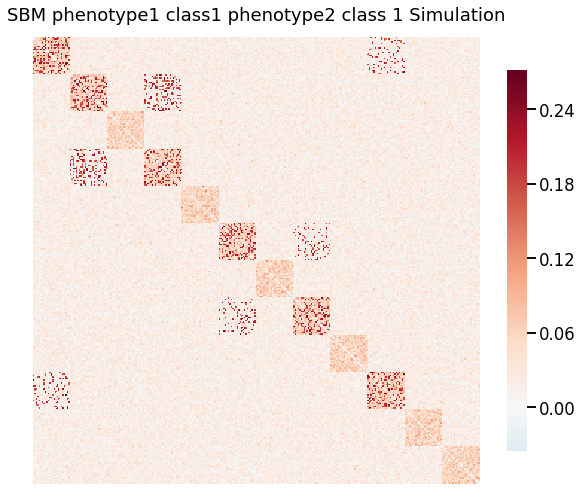

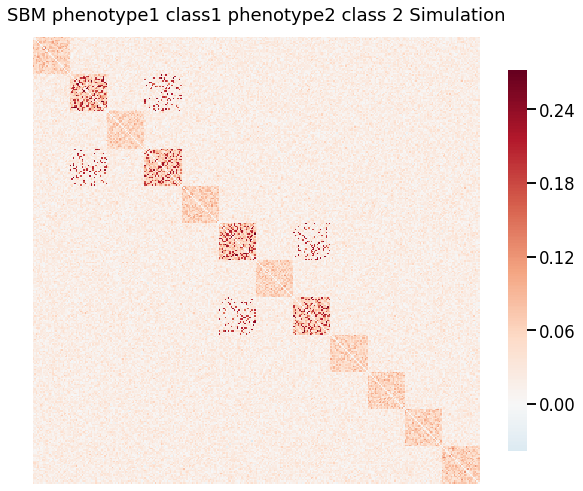

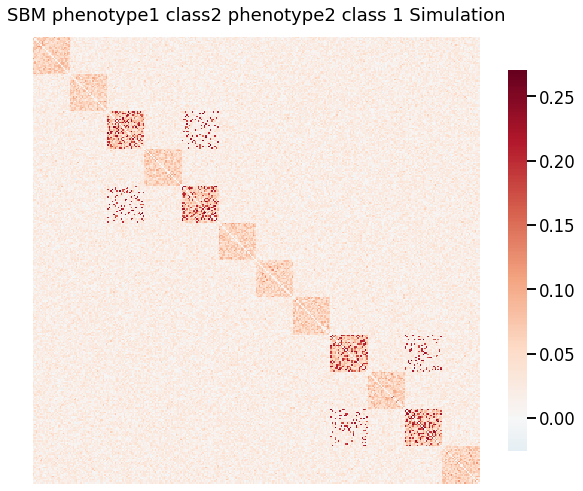

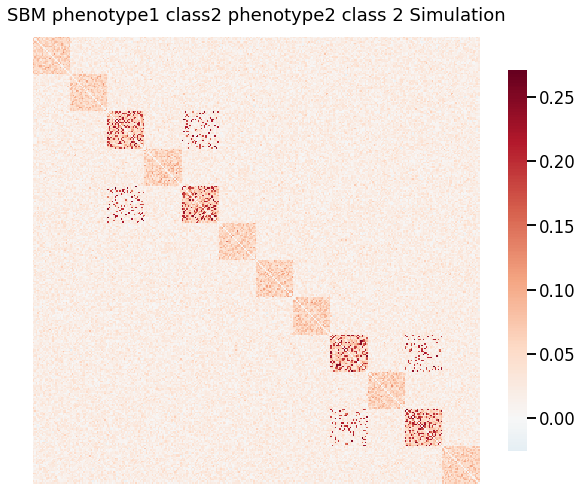

In [163]:
from graspy.plot import heatmap

heatmap(G1[0:50,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 1 Simulation')
heatmap(G1[50:100,:].mean(axis = 0), title ='SBM phenotype1 class1 phenotype2 class 2 Simulation')
heatmap(G2[0:50,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 1 Simulation')
heatmap(G2[50:100,:].mean(axis = 0), title ='SBM phenotype1 class2 phenotype2 class 2 Simulation')

In [125]:
A = np.concatenate((G1[0:40,:,:],G1[50:90,:,:],G2[0:40,:,:],G2[50:90,:,:]), axis=0)
y1_ = np.concatenate((y1[0:40],y1[50:90],y1[100:140],y1[150:190]), axis=0)
y2_ = np.concatenate((y2[0:40],y2[50:90],y2[100:140],y2[150:190]), axis=0)

Atest = np.concatenate((G1[40:50,:,:],G1[90:100,:,:],G2[40:50,:,:],G2[90:100,:,:]), axis=0)
y1test = np.concatenate((y1[40:50],y1[90:100],y1[140:150],y1[190:200]), axis=0)
y2test = np.concatenate((y2[40:50],y2[90:100],y2[140:150],y2[190:200]), axis=0)

In [174]:
def getRotation(theta):
    #return the rotation matrix for theta
    a = np.zeros((2,2),dtype=float)
    
    a[0][0] = cos(theta)
    a[0][1] = -sin(theta)
    a[1][0] = sin(theta)
    a[1][1] = cos(theta)
    
    return a.T

In [173]:
def getDifRotation(theta):
    #return the gradient with respect to theta for the rotation matrix
    a = np.zeros((2,2),dtype=float)
    
    a[0][0] = -sin(theta)
    a[0][1] = -cos(theta)
    a[1][0] = cos(theta)
    a[1][1] = -sin(theta)
    
    return a.T

In [192]:
def fit_cls(A,e1,e2,y1,y2,iter,stepSize,rho,gamma):
    
    
    #we are fitting 3 parameters B,a,b to the data
    
    sampleTest,N,_ = A.shape
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    
    B = np.ones((dim1,N,N), dtype=float)/(dim1*N*N)
    b = 0
    theta = 0
    S = np.zeros((dim1,1), dtype=float)

    for itr in range(1,iter):
        loss = 0
        gradB = np.zeros((dim1,N,N), dtype=float)
        gradtheta = 0
        sym = np.zeros((dim1,N,N), dtype=float)
        gradb = 0
        a = getRotation(theta)
        
        
        #update B
        for k in range(0,sampleTest):
            tmp = b
            tmpGradB = np.zeros((dim1,N,N), dtype=float) 
            
            
            
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
                
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                    for i in range(0,dim):
                        #tmp -= e1[j,i]*np.sum(B[i,:,:]*A[k,:,:]) 
                        tmpGradB[i,:,:] -= 2*val*e1[j,i]*A[k,:,:] 
                else:
                    tmp += val**2
                    for i in range(0,dim):
                        #tmp += e1[j,i]*np.sum(B[i,:,:]*A[k,:,:])
                        tmpGradB[i,:,:] += 2*val*e1[j,i]*A[k,:,:]
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                
                if y2[k] == j:
                    tmp -= val**2
                    for i in range(0,dim1):
                        tmpGradB[i,:,:] -= 2*val*( e2[j,:]@a[:,i] )*A[k,:,:]
                else:
                    tmp += val**2
                    for i in range(0,dim1):
                        tmpGradB[i,:,:] += 2*val*( e2[j,:]@a[:,i] )*A[k,:,:]
                        
        
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            gradB += phi_*tmpGradB
            
        for i in range(0,dim):
            sym[i,:,:] = 2*(B[i,:,:]-B[i,:,:].T)

        gradB = gradB/sampleTest + rho*np.sign(B) + 2*gamma*B + sym
        B = B - stepSize*gradB
        
        
        
        #update theta to get the rotation matrix a
        for k in range(0,sampleTest):
            tmp = b
            tmpGradtheta = 0
            
            for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[k,:,:])
                
                
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                if y2[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                     
            
            difTheta = getDifRotation(theta)
            
            for j in range(0,dim2):
                if y2[k] == j:
                    tmpGradtheta -= e2[j,:].reshape(1,-1)@difTheta@S.reshape(-1,1)
                else:
                    tmpGradtheta += e2[j,:].reshape(1,-1)@difTheta@S.reshape(-1,1)
            
            phi = ex(tmp)
            phi_ = phi/(1+phi)
            
            gradtheta += phi_*tmpGradtheta
        
        theta = theta - stepSize*gradtheta/sampleTest
        
        
        
        #update the bias b
        for k in range(0,sampleTest):
            tmp = b 
            for j in range(0,dim1):
                val = e1[j,:].reshape(1,-1)@S.reshape(-1,1)
                if y1[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            for j in range(0,dim2):
                val = e1[j,:].reshape(1,-1)@(a@S.reshape(-1,1))
                if y2[k] == j:
                    tmp -= val**2
                else:
                    tmp += val**2
                        
            loss += log(1+phi)
            phi = ex(tmp)
            
            gradb += phi/(1+phi)
            
        b = b - stepSize*gradb/sampleTest
        
    print(loss)
    
    a = getRotation(theta)
    return B,a,b

In [184]:
def predictAccuracy(B,a,b,e1,e2,A,y1,y2):
    l = len(y1)
    dim1,_ = e1.shape
    dim2,_ = e2.shape
    #print(y2)
    accuracy = np.zeros((2,1),dtype=float)
    S = np.zeros((dim1,1), dtype=float)
    
    for m in range(0,l):
        lbl1 = []
        lbl2 = []
        for i in range(0,dim1):
                S[i] = np.sum(B[i,:,:]*A[m,:,:])
                
        for j in range(0,dim1):
            lbl1.append(e1[j,:]@S)
            
        for j in range(0,dim2):
            lbl2.append(e2[j,:]@a@S)
        
        
        
        phen1 = np.argmax(np.abs(np.asarray(lbl1)))
        phen2 = np.argmax(np.abs(np.asarray(lbl2)))
        
        print('The predicted labels: phenotype1=%d, phenotype2=%d, true labels: phenotype1=%d, phenotype2=%d'%(phen1+1,phen2+1,y1[m]+1,y2[m]+1))
        print(lbl1,lbl2)
        #print(e@R@A[i,:,:]@C,y[i])
        #print('hi')
        #print(cls, y[i])
        if phen1 == y1[m]:
            accuracy[0] += 1
            
        if phen2 == y2[m]:
            accuracy[1] += 1

    return accuracy*100/l

In [185]:
def crossValidate(A,e1,e2,y1,y2,iter,stepSize,rho,gamma,fold):
    accuracy = np.zeros((2,1),dtype=float)
    _,count = np.unique(y, return_counts=True)
    totalSample, N, _ = A.shape
    
    count = count/totalSample
    indx = np.asarray(range(0,totalSample))
    random.shuffle(indx)
    
    testSample = int(totalSample/fold)
    for i in range(0,fold):
        indx = np.roll(indx,testSample)
        B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
        testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])
        accuracy += testAccuracy

    accuracy = accuracy/fold
    return accuracy

In [186]:
def getBase(dim):
    #create base for arbitrary dimension dim
    #here Gram-Schmidt decomposition has been used
    
    e = np.zeros((dim,dim),dtype=float)
    labelVec = np.asarray(range(1,dim+1),dtype=float)
    e[0,:] = labelVec/(labelVec@labelVec.T)**.5

    for i in range(1,dim):
        tmp = np.roll(labelVec,i)
        tmp = tmp.reshape(1,-1)
        tmp_ = tmp.copy()
        for j in range(0,i):
            eTmp = e[j,:].reshape(1,-1)
            tmp_ -= (tmp@eTmp.T/(eTmp@eTmp.T))*eTmp
            #print(tmp.shape)
        e[i,:] = tmp_/(tmp_@tmp_.T)**.5
    return e

In [ ]:
iter = 100
stepSize = 1e-2
B = np.ones((dim,N,N), dtype=float)/(dim*N*N)
rho = 1e-4   #parameter for sparsity
gamma = 1e-6 #parameter for numerical stability

#fold = 10
#accuracy = 0

_,count1 = np.unique(y1_, return_counts=True)
dim1 = len(count1)

_,count2 = np.unique(y2_, return_counts=True)
dim2 = len(count2)

e1 = getBase(dim1)
e2 = getBase(dim2)
totalSample, N, _ = A.shape


B,a,b = fit_cls(A,e1,e2,y1_,y2_,iter,stepSize,rho,gamma)
testAccuracy = predictAccuracy(B,a,b,e1,e2,Atest,y1test,y2test)    

print(testAccuracy)

#indx = np.asarray(range(0,totalSample))
#random.shuffle(indx)

#testSample = int(totalSample/fold)
#for i in range(0,fold):
#    print("Doing test on %d fold.........\n"%(i+1))
#    B,a,b = fit_cls(A[indx[0:totalSample-testSample],:,:],e1,e2,y1[indx[0:totalSample-testSample]],y2[indx[0:totalSample-testSample]],iter,stepSize,rho,gamma)
#    testAccuracy = predictAccuracy(B,a,b,e1,e2,A[indx[totalSample-testSample:totalSample],:,:],y1[indx[totalSample-testSample:totalSample]],y2[indx[totalSample-testSample:totalSample]])    
#    accuracy += testAccuracy
#    print(testAccuracy)
    
#    indx = np.roll(indx,testSample)
#accuracy = accuracy/fold
#print("Total accuracy %f %f\n"%(accuracy[0],accuracy[1]))

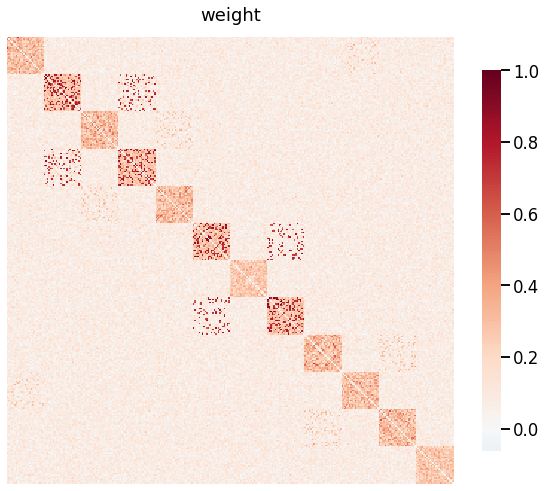

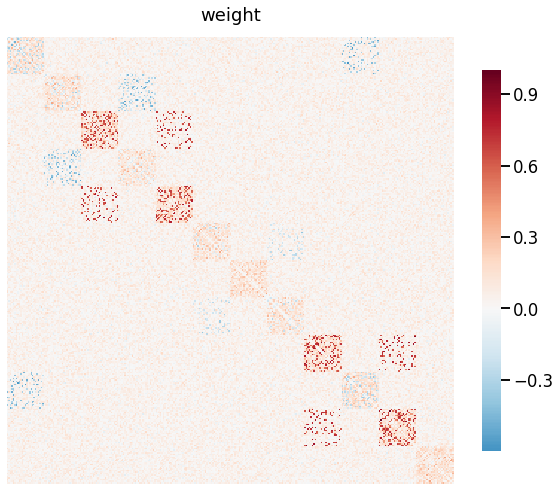

In [148]:
heatmap(B[0,:,:]/np.max(B[0,:,:]), title ='weight')
heatmap(B[1,:,:]/np.max(B[1,:,:]), title ='weight')

In [149]:
testAccuracy = predictAccuracy(B,a,b,e1,e2,A,y1_,y2_)    
print('Accuracy  on training : phen1=%f, phen2=%f'%(testAccuracy[0],testAccuracy[1]))

The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.83161059]), array([3.12080396])] [array([2.22396377]), array([2.85450519])]
The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.78843026]), array([3.08968384])] [array([2.1770849]), array([2.82929857])]
The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.90424424]), array([3.21569037])] [array([2.30838122]), array([2.93907924])]
The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.8436071]), array([3.14190157])] [array([2.23861602]), array([2.87385298])]
The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.92965098]), array([3.23726467])] [array([2.3363909]), array([2.95714609])]
The predicted labels: phenotype1=2, phenotype2=2, true labels: phenotype1=2, phenotype2=2
[array([1.9001011]), array([3.224

In [150]:
a

array([[ 0.99141392, -0.13076103],
       [ 0.13076103,  0.99141392]])

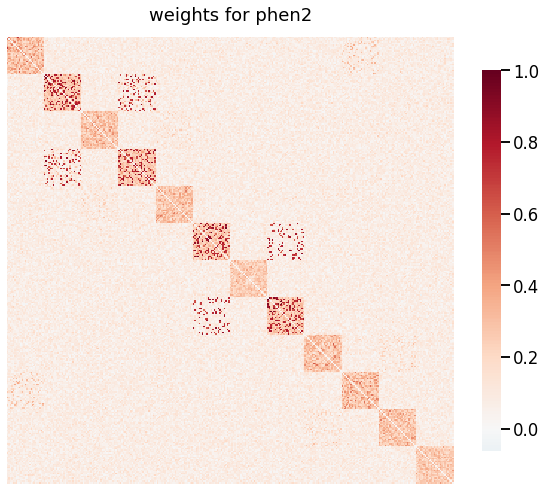

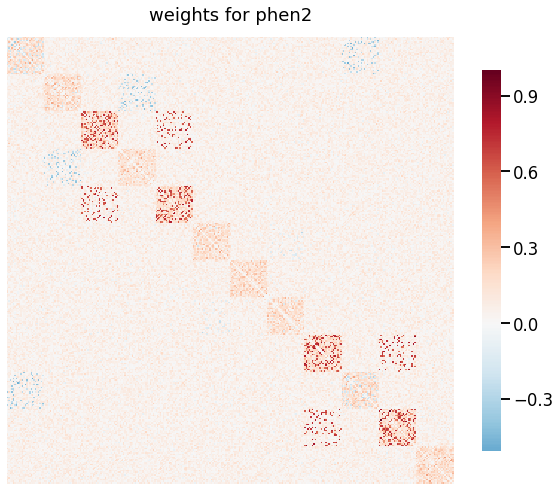

In [151]:
B1 = a[0,0]*B[0,:,:] + a[0,1]*B[1,:,:]
B2 = a[1,0]*B[0,:,:] + a[1,1]*B[1,:,:]
heatmap(B1/np.max(B1), title ='weights for phen2')
heatmap(B2/np.max(B2), title ='weights for phen2')

In [82]:
def paramPoint(A,B):
    dim,_,_ = B.shape
    pt = np.zeros((dim,1),dtype=float)
    
    for i in range(0,dim):
        pt[i] = np.sum(B[i,:,:]*A) 
        
    return pt

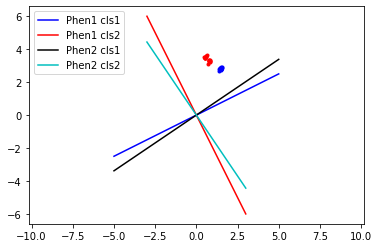

In [155]:
origin = [0], [0] # origin point
x1 = np.linspace(-5,5,1000)
x2 = np.linspace(-3,3,1000)

#plt.quiver(*origin, 300*e1[:,0], 300*e1[:,1], scale=400)
#plt.quiver(*origin, -300*e1[:,0], -300*e1[:,1], scale=400)

slope1 = e1[0][0]/e1[0][1]
slope2 = e1[1][0]/e1[1][1]

#print(slope1,slope2)
plt.plot(x1,slope1*x1,color='b',label='Phen1 cls1')
plt.plot(x2,slope2*x2,color='r',label='Phen1 cls2')

e = a.T@e2
#plt.quiver(*origin, 300*e[:,0], 300*e[:,1], color = 'r', scale=1000)
#plt.quiver(*origin, -300*e[:,0], -300*e[:,1], color = 'b', scale=1000)
slope1 = e[0][0]/e[0][1]
slope2 = e[1][0]/e[1][1]

#print(slope1,slope2)
plt.plot(x1,slope1*x1,color='k',label='Phen2 cls1')
plt.plot(x2,slope2*x2,color='c',label='Phen2 cls2')


#plt.plot(x1/3,e[0][1]*(x1/3)/e[0][0],color='k')
#plt.plot(x2,e[1][1]*(x2)/e[1][0],color='k')
l = len(y1test)

for i in range(0,l):
    pt = paramPoint(Atest[i,:,:],B)
    if y1test[i] == 0:
        plt.plot(pt[1],pt[0],'.',color = 'b')
    else:
        plt.plot(pt[1],pt[0],'.',color = 'r')

        
plt.axis('equal')
plt.legend()
plt.show()

In [195]:
y2_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

In [191]:
dim2

1